In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize']=(5,5)
sns.set_theme(color_codes=True)

In [ ]:
data=pd.read_csv("/content/Big Mart Sales Prediction.csv")
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.shape

(8523, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#DATA PRE-PROCESSING

#Checking the number of unique values
data.select_dtypes(include='object').nunique()

ProductID       1559
FatContent         5
ProductType       16
OutletID          10
OutletSize         3
LocationType       3
OutletType         4
dtype: int64

In [ ]:
data.dtypes

ProductID             object
Weight               float64
FatContent            object
ProductVisibility    float64
ProductType           object
MRP                  float64
OutletID              object
EstablishmentYear      int64
OutletSize            object
LocationType          object
OutletType            object
OutletSales          float64
dtype: object

In [ ]:
#Drop product id column because it is unnecessary
data.drop(columns='ProductID',inplace=True)
data.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


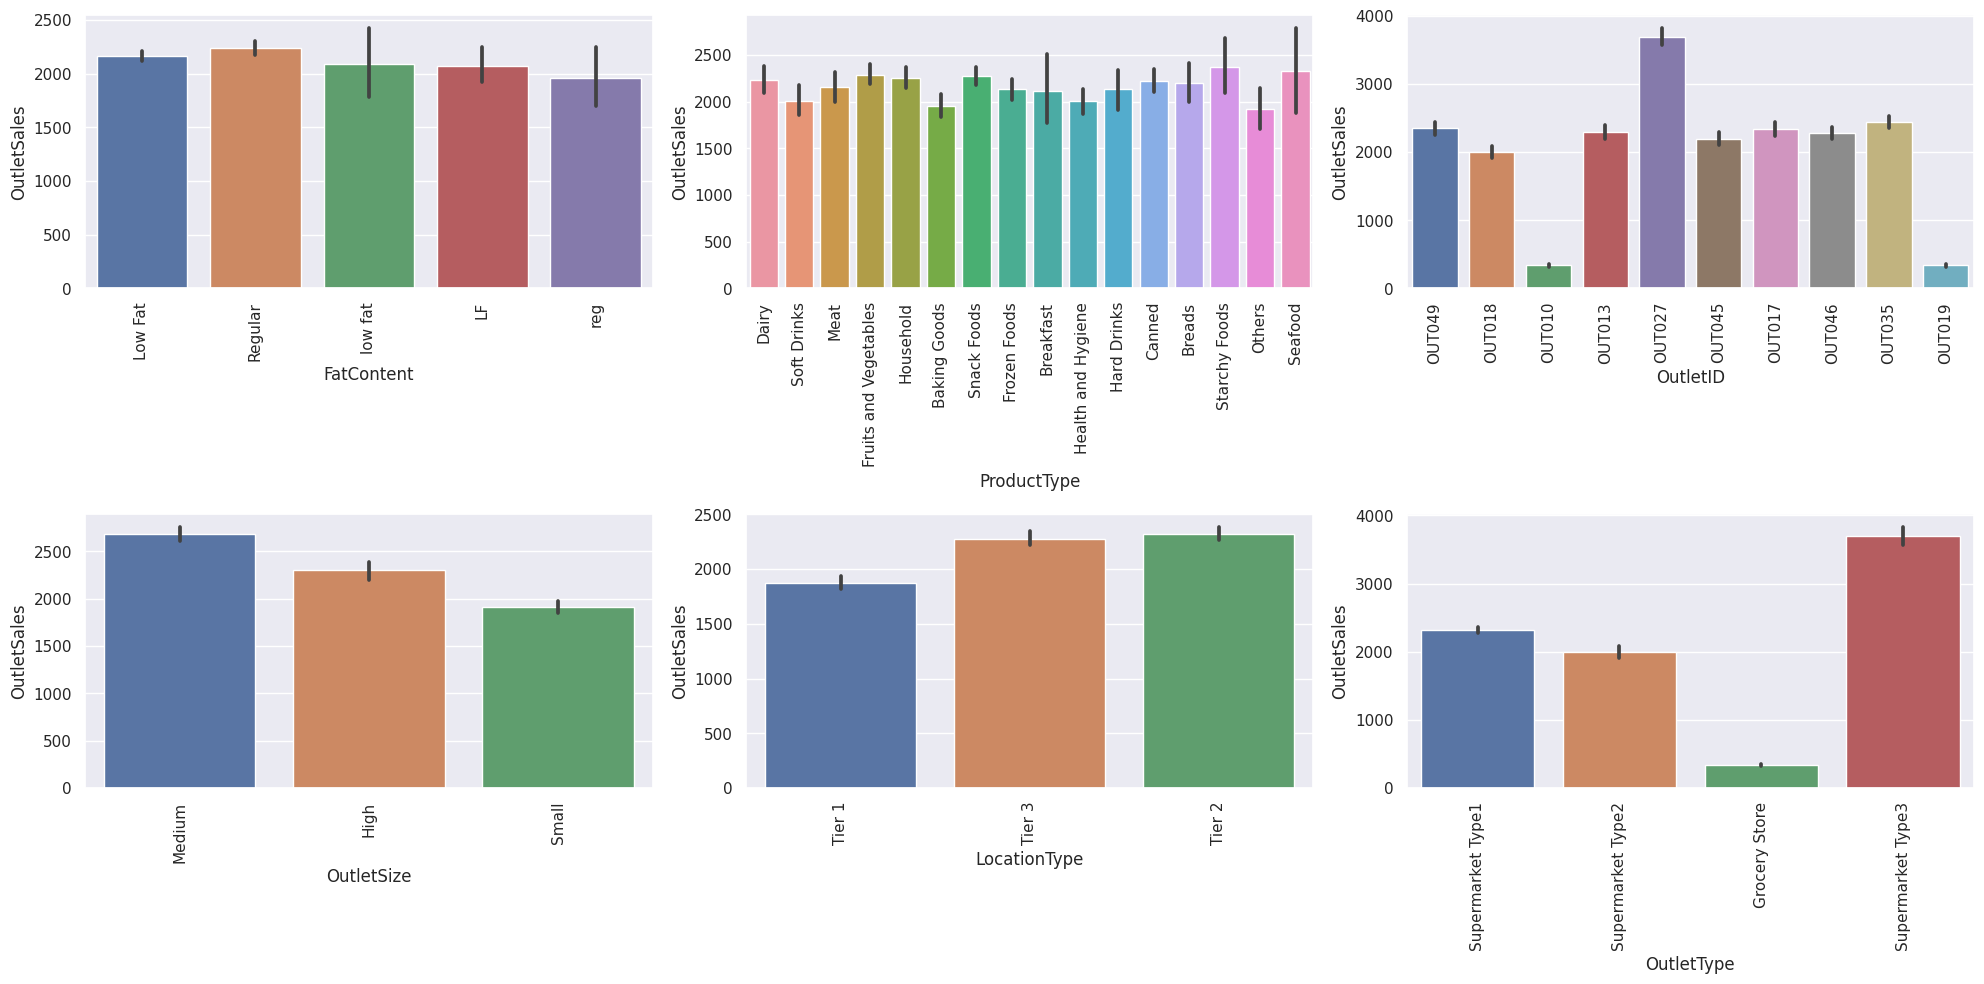

In [ ]:
#EXPLORATORY DATA ANALYSIS

#Constructing bar sublpots on categorical features against outlet sales
#list of categorical variables

cat_vars=['FatContent','ProductType','OutletID','OutletSize','LocationType','OutletType']
#create figure with subplots
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

#creating bar plot for each categorical variable
for i,var in enumerate(cat_vars):
  sns.barplot(x=var,y='OutletSales',data=data,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
fig.tight_layout()

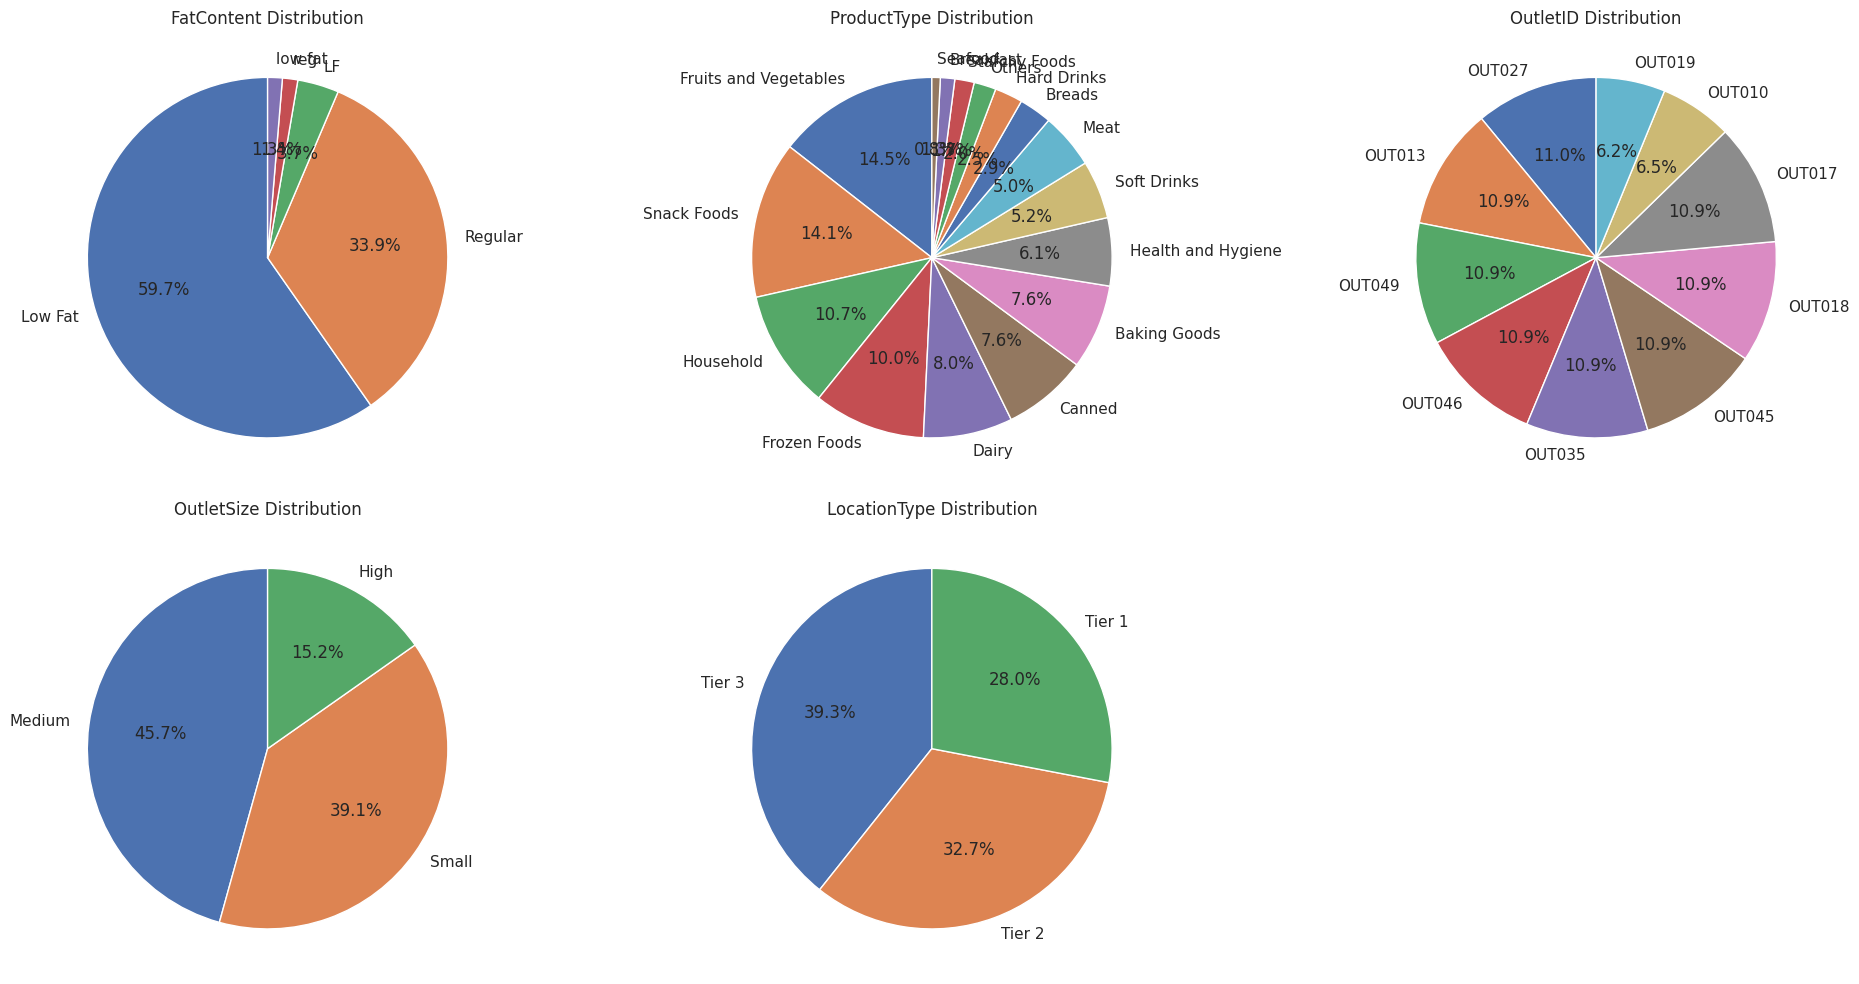

In [ ]:
#Creating pie-charts for each categorical variable
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

for i,var in enumerate(cat_vars):
  if i<len(axs):
    #count the number of occurences of each category
    cat_counts=data[var].value_counts()
    axs.flat[i].pie(cat_counts,labels=cat_counts.index,autopct='%1.1f%%',startangle=90)
    axs.flat[i].set_title(f'{var} Distribution')
fig.tight_layout()
fig.delaxes(axs[5])

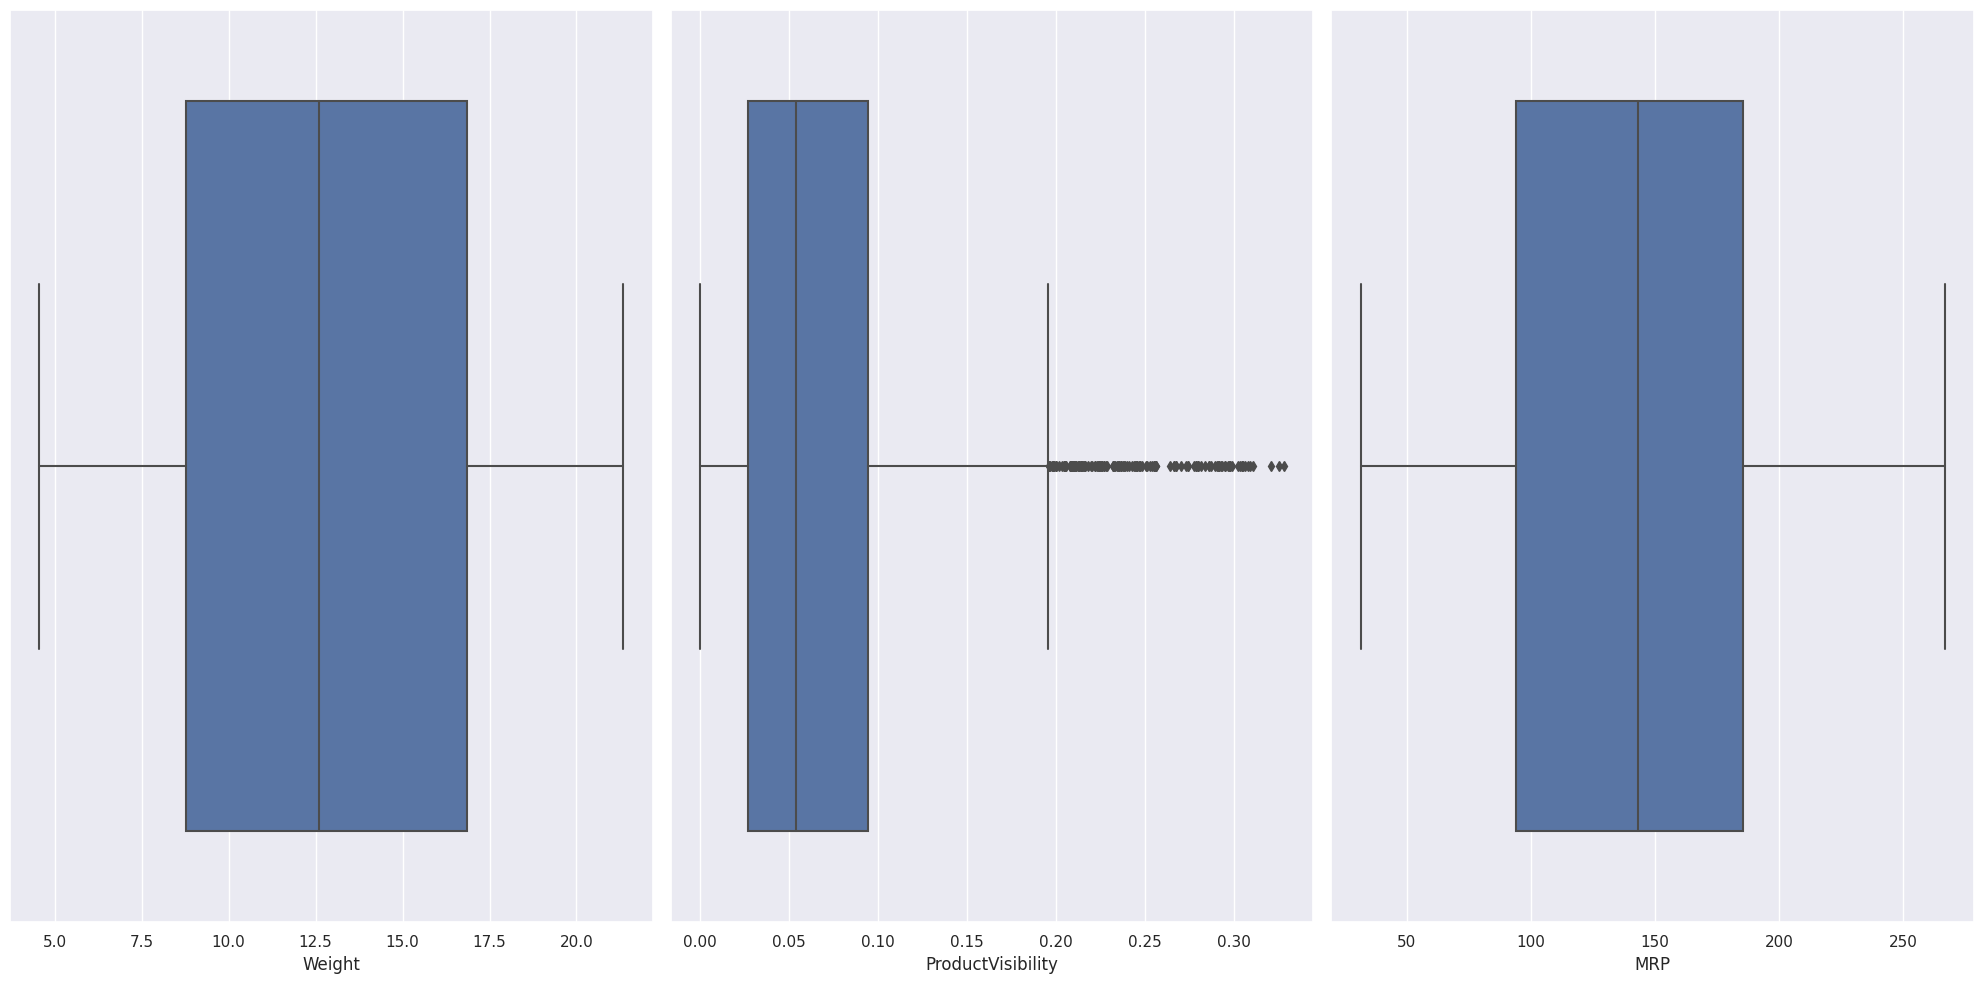

In [ ]:
#Analysing Numerical Variables
#Creating box plot for each numerical variable
num_vars=['Weight','ProductVisibility','MRP']
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()
for i,var in enumerate(num_vars):
  sns.boxplot(x=var,data=data,ax=axs[i])
fig.tight_layout()

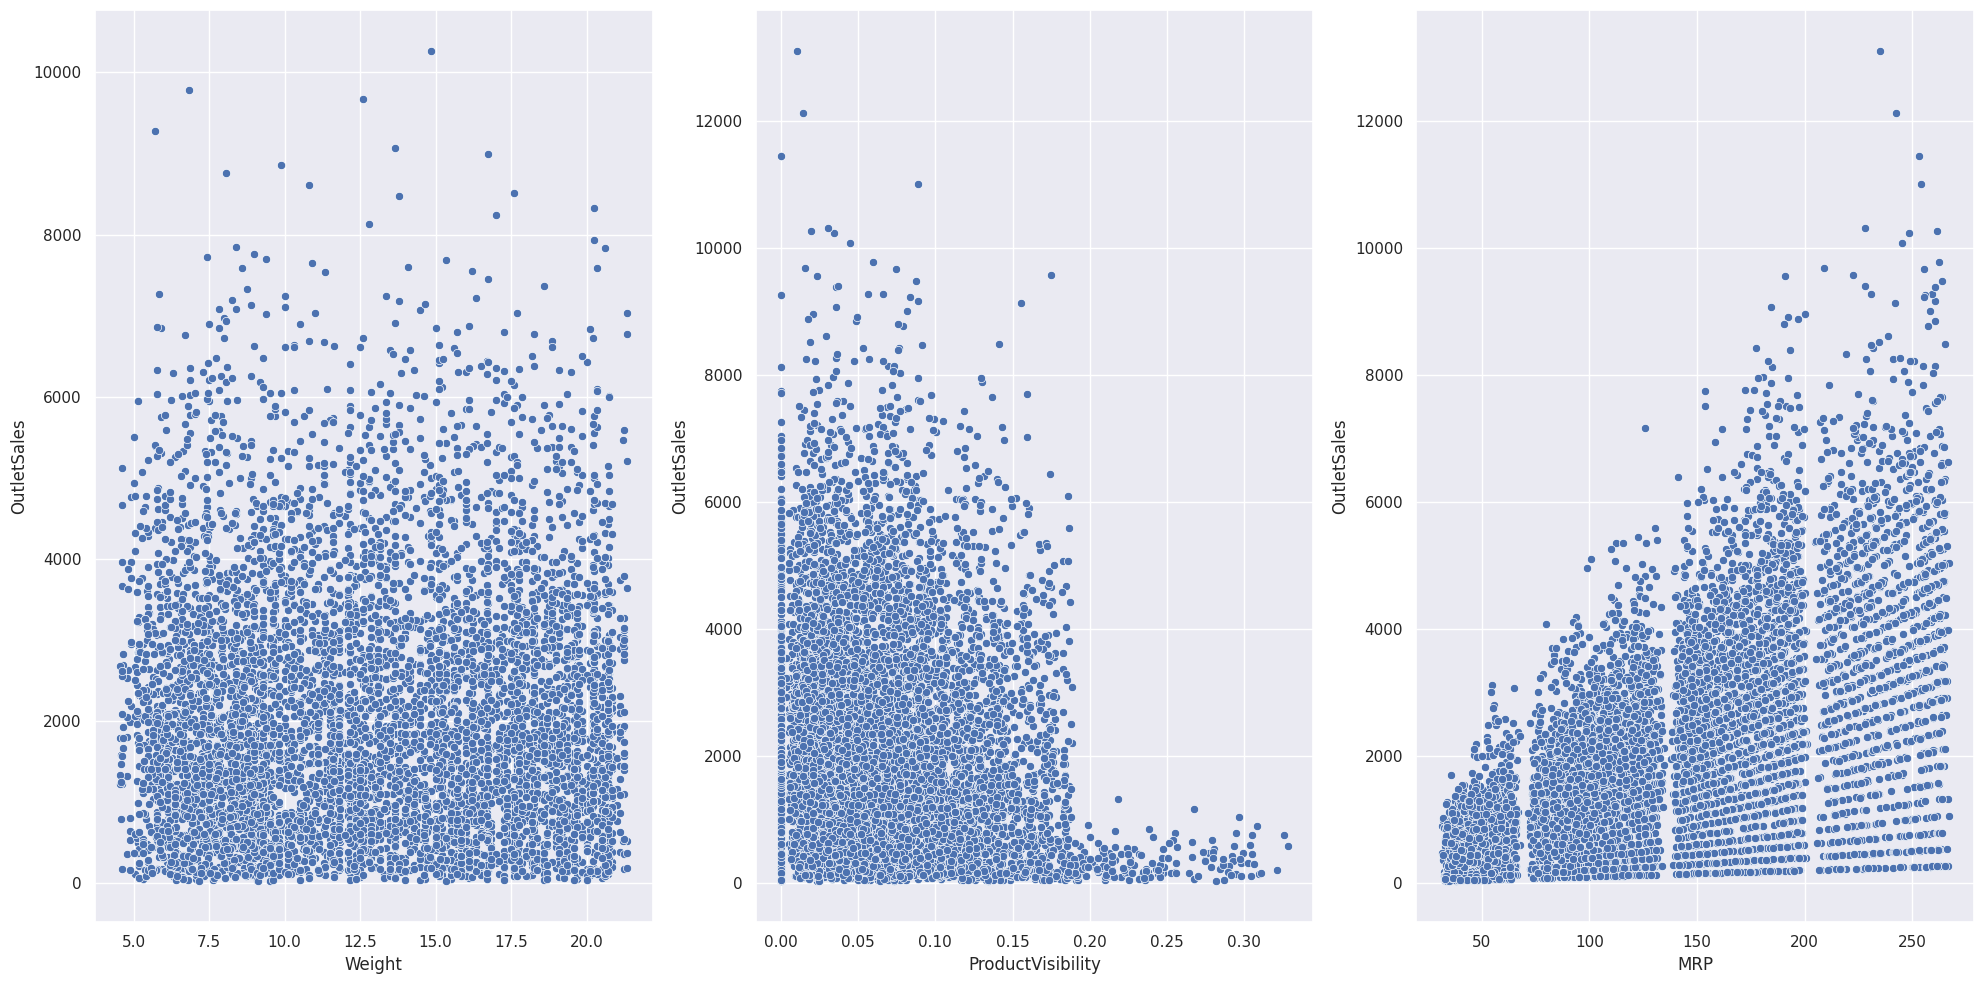

In [ ]:
#Creating scatter plots
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()
for i,var in enumerate(num_vars):
  sns.scatterplot(x=var,y='OutletSales',data=data,ax=axs[i])
fig.tight_layout()

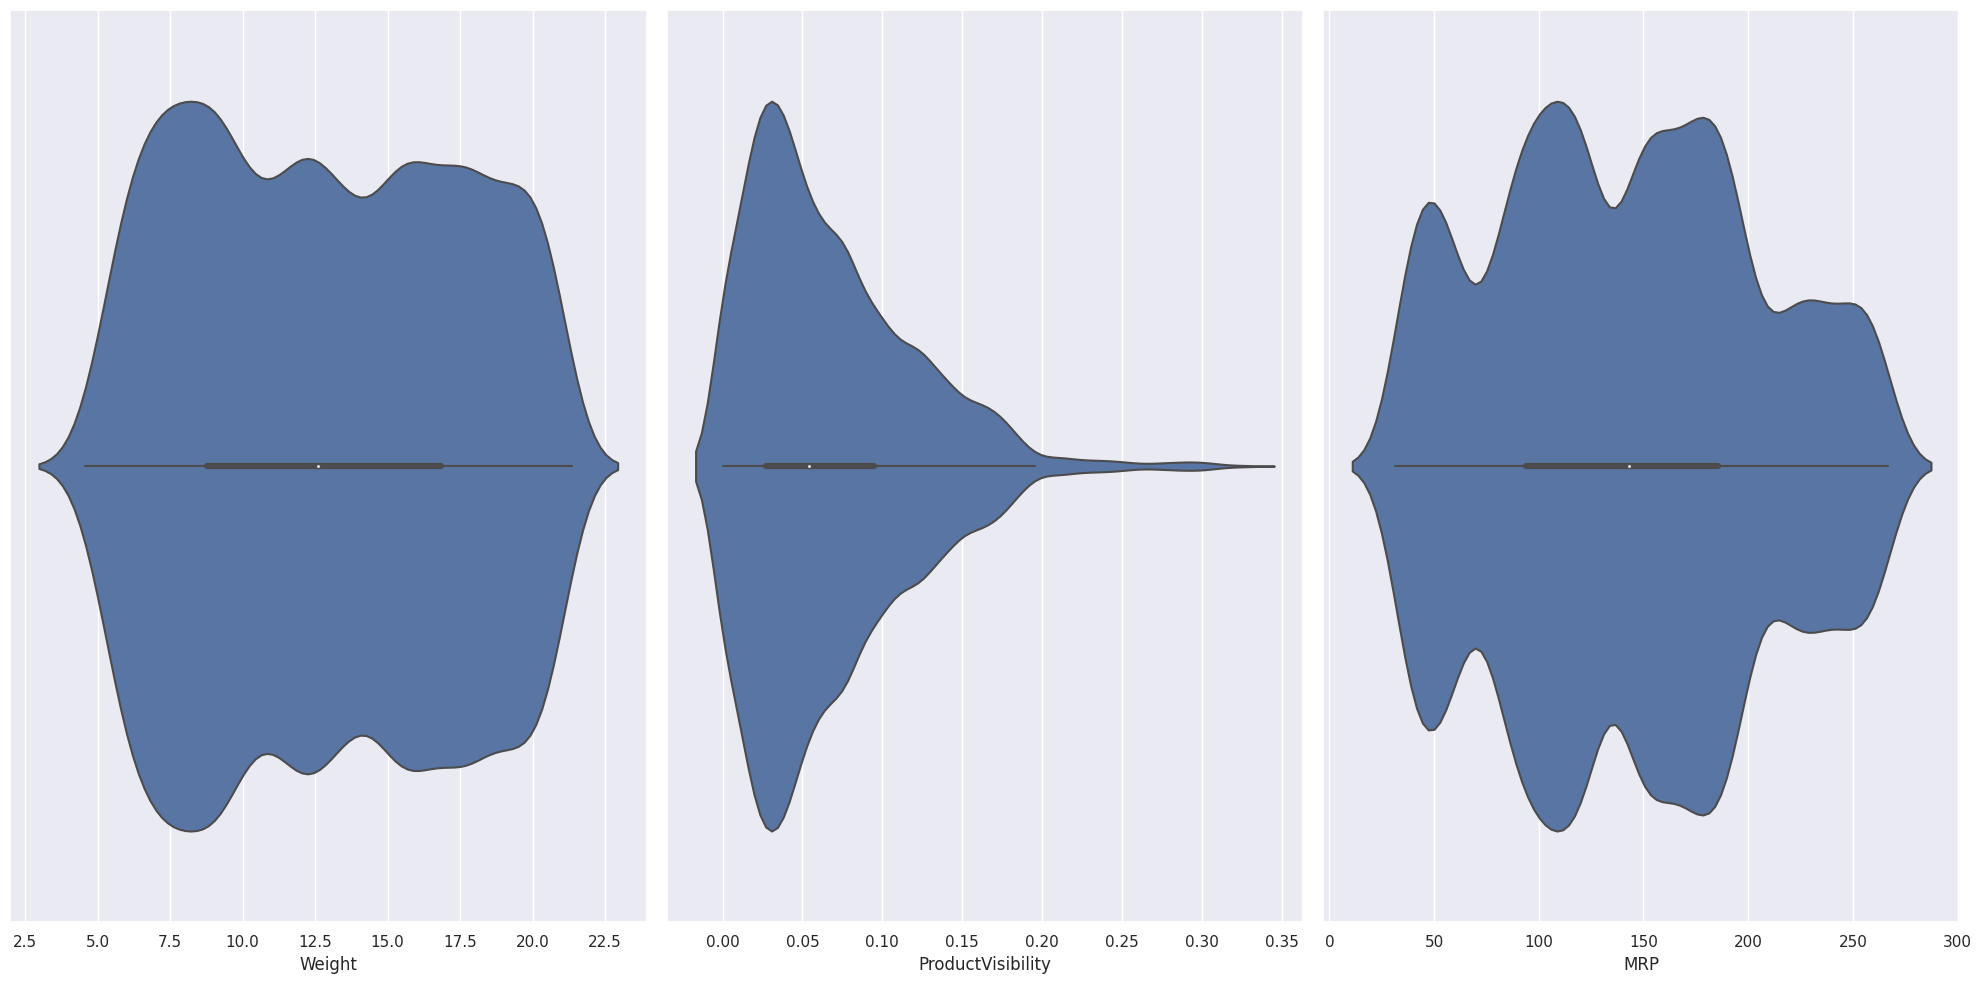

In [ ]:
#Making a violin plot for numerical variables
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()
for i,var in enumerate(num_vars):
  sns.violinplot(x=var,data=data,ax=axs[i])
fig.tight_layout()

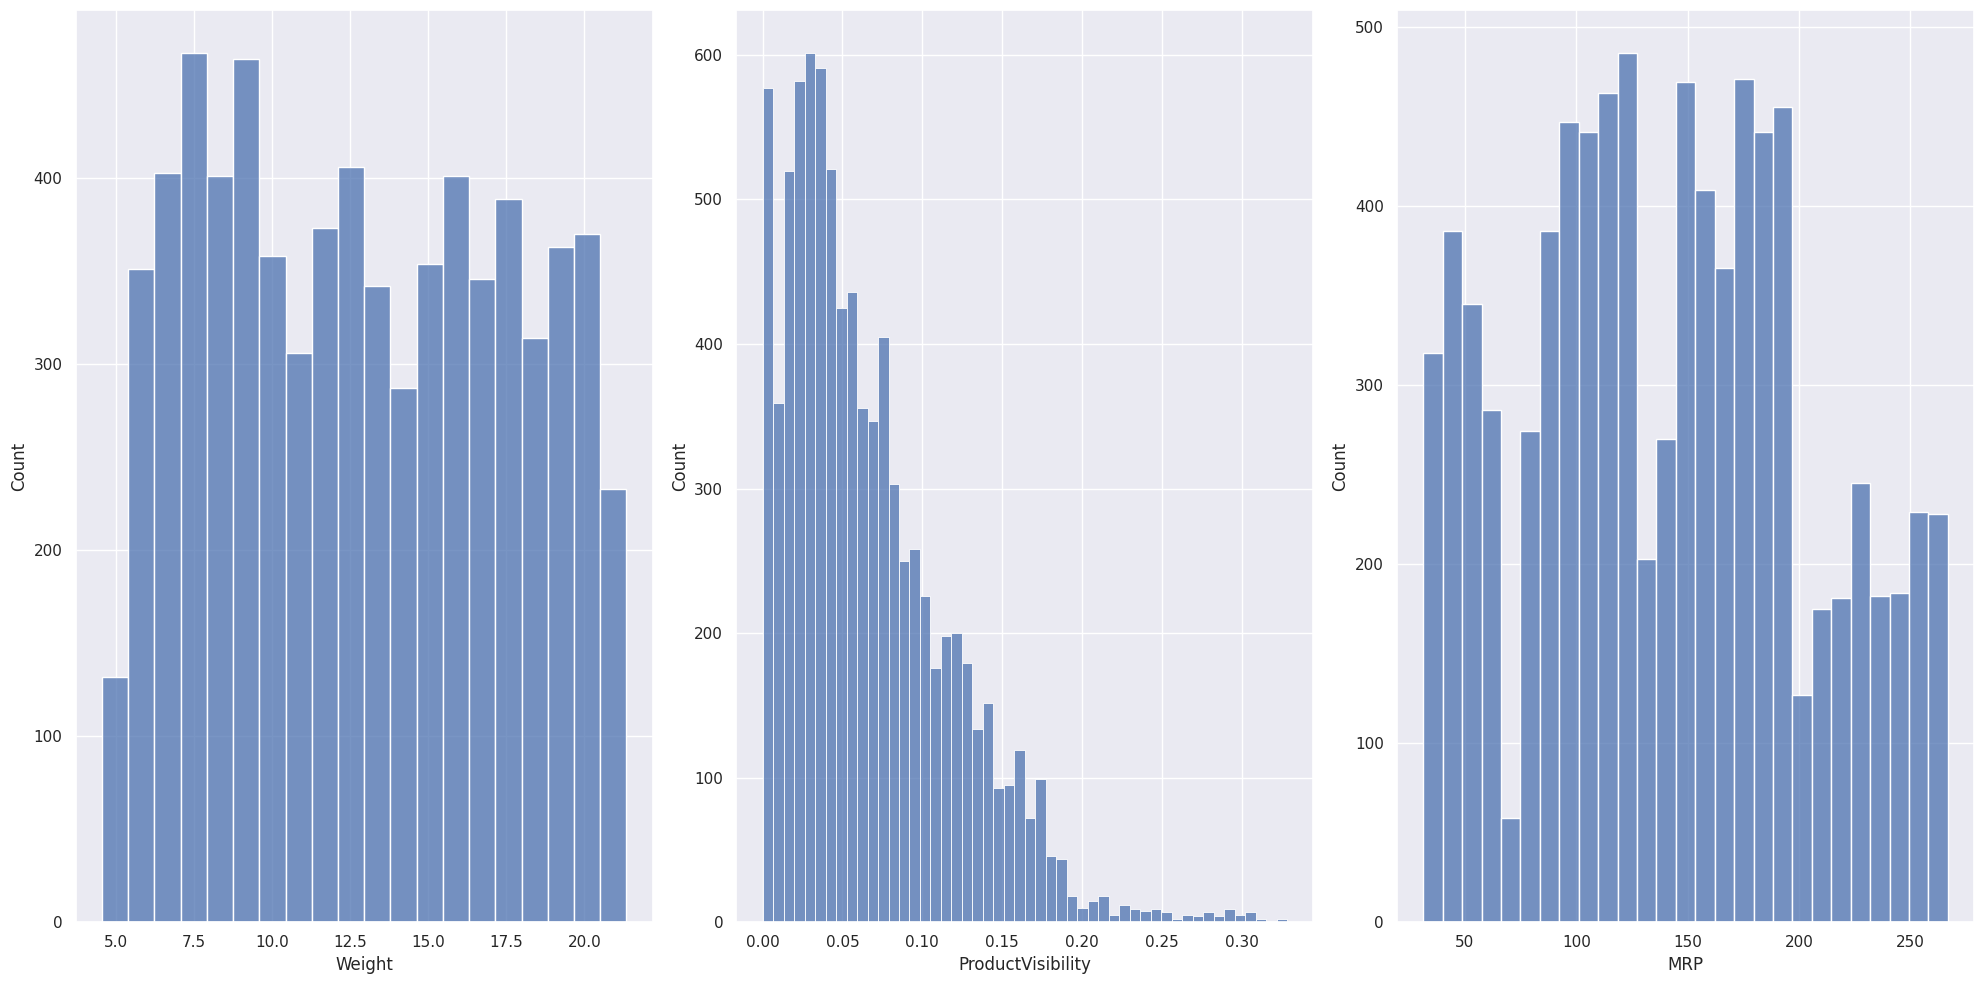

In [ ]:
#Creating histograms for numerical variables
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs=axs.flatten()
for i,var in enumerate(num_vars):
  sns.histplot(x=var,data=data,ax=axs[i])
fig.tight_layout()

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

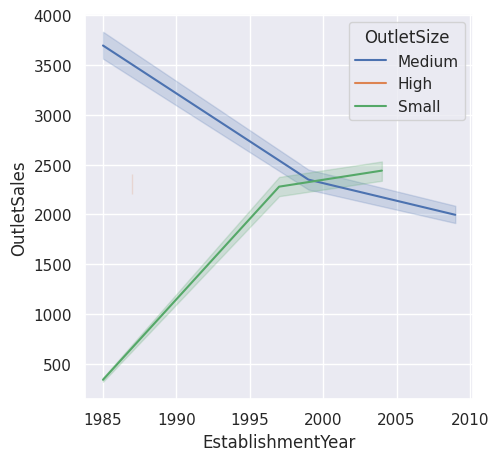

In [ ]:
#Making line plots of Establishment year and outlet sales against each categorical variables
#Making a line plot of outlet sales against estabilishment year on the bases of outlet size
sns.lineplot(data=data,x='EstablishmentYear',y='OutletSales',hue='OutletSize')

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

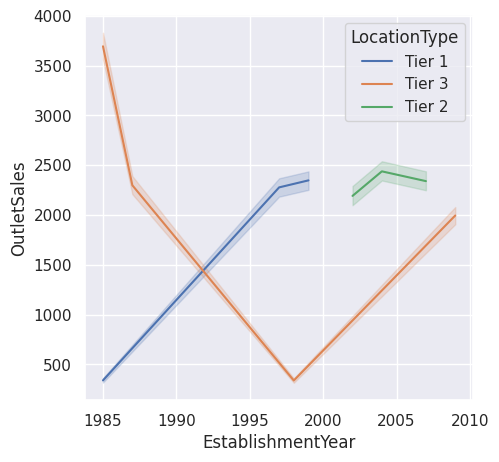

In [ ]:
#Making a line plot of outlet sales against estabilishment year on the bases of location type
sns.lineplot(data=data,x='EstablishmentYear',y='OutletSales',hue='LocationType')

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

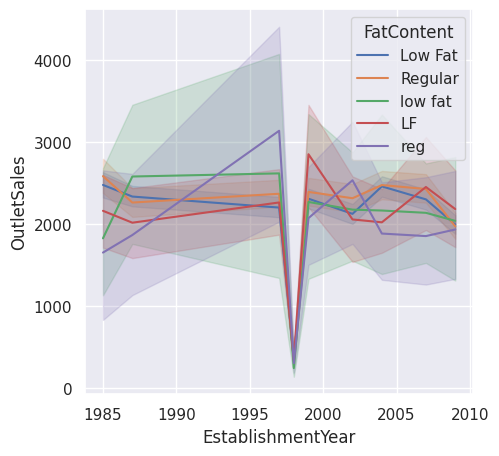

In [ ]:
#Making a line plot of outlet sales against estabilishment year on the bases of fat content
sns.lineplot(data=data,x='EstablishmentYear',y='OutletSales',hue='FatContent')

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

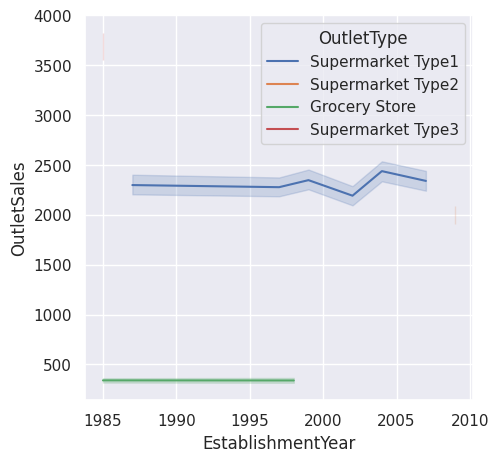

In [ ]:
#Making a line plot of outlet sales against estabilishment year on the bases of outlet type
sns.lineplot(data=data,x='EstablishmentYear',y='OutletSales',hue='OutletType')

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

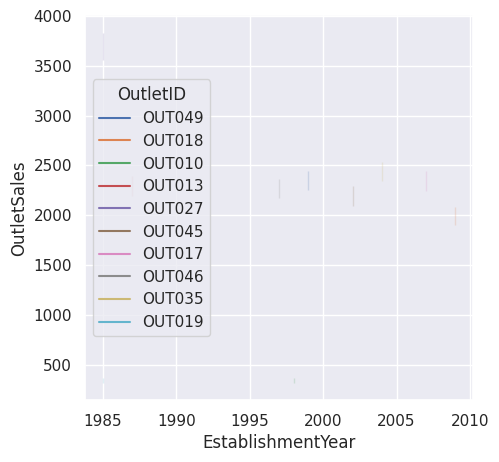

In [ ]:
sns.lineplot(data=data,x='EstablishmentYear',y='OutletSales',hue='OutletID')

<Axes: xlabel='EstablishmentYear', ylabel='OutletSales'>

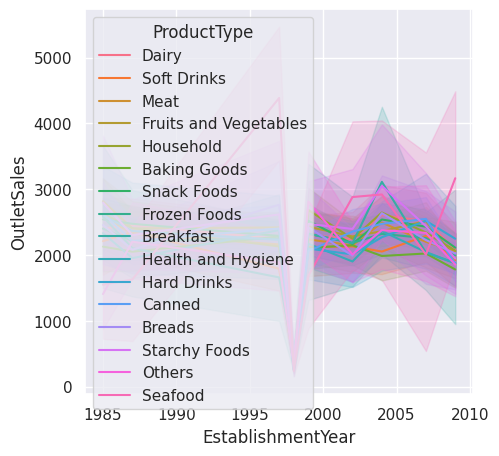

In [ ]:
sns.lineplot(data=data,x='EstablishmentYear',y='OutletSales',hue='ProductType')

In [ ]:
#DATA PRE-PROCESSING

In [ ]:
#Checking missing values
check_missing=data.isnull().sum()*100/data.shape[0]
check_missing

Weight               17.165317
FatContent            0.000000
ProductVisibility     0.000000
ProductType           0.000000
MRP                   0.000000
OutletID              0.000000
EstablishmentYear     0.000000
OutletSize           28.276428
LocationType          0.000000
OutletType            0.000000
OutletSales           0.000000
dtype: float64

In [ ]:
data.isnull().sum()

Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [ ]:
data.isnull().sum()*100/data.shape[0]

Weight               17.165317
FatContent            0.000000
ProductVisibility     0.000000
ProductType           0.000000
MRP                   0.000000
OutletID              0.000000
EstablishmentYear     0.000000
OutletSize           28.276428
LocationType          0.000000
OutletType            0.000000
OutletSales           0.000000
dtype: float64

In [ ]:
check_missing[check_missing>0].sort_values(ascending=False)

OutletSize    28.276428
Weight        17.165317
dtype: float64

In [ ]:
#Filling the missing values
#Filling the missing values of weight with mean
data['Weight']=data['Weight'].fillna(data['Weight'].mean())

In [ ]:
data.OutletSize.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
data.shape

(8523, 11)

In [ ]:
#Finding in which outlet type we have nan values in outlet size using groupby() function
unique_sizes_train3=data.groupby("OutletType")["OutletSize"].unique()
unique_sizes_train3

OutletType
Grocery Store                      [nan, Small]
Supermarket Type1    [Medium, High, nan, Small]
Supermarket Type2                      [Medium]
Supermarket Type3                      [Medium]
Name: OutletSize, dtype: object

In [ ]:
#Filling the outlet size in Grocery store with Small value
data.loc[(data['OutletType']=='Grocery Store')&(data['OutletSize'].isna()),'OutletSize']='Small'
# .loc() function is used to access a particular element using index and column names
#Dropping the nan values in OutletSize
data.dropna(subset=['OutletSize'],inplace=True)
print(data.shape)

(6668, 11)


In [ ]:
#Again checking missing values
data.isnull().sum()*100/data.shape[0]

Weight               0.0
FatContent           0.0
ProductVisibility    0.0
ProductType          0.0
MRP                  0.0
OutletID             0.0
EstablishmentYear    0.0
OutletSize           0.0
LocationType         0.0
OutletType           0.0
OutletSales          0.0
dtype: float64

In [ ]:
#LABEL ENCODING FOR EACH OBJECT DATA TYPE
data.select_dtypes(include='object').nunique()

FatContent       5
ProductType     16
OutletID         8
OutletSize       3
LocationType     3
OutletType       4
dtype: int64

In [ ]:
#Loop for each column in the DataFrame where dtype is 'object'
for col in data.select_dtypes(include='object').columns:
  print(f'{col}:{data[col].unique()}')

FatContent:['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
ProductType:['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Breakfast' 'Health and Hygiene'
 'Hard Drinks' 'Frozen Foods' 'Canned' 'Starchy Foods' 'Others' 'Breads'
 'Seafood']
OutletID:['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT046' 'OUT035' 'OUT019']
OutletSize:['Medium' 'Small' 'High']
LocationType:['Tier 1' 'Tier 3' 'Tier 2']
OutletType:['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
#Label Encoding
from sklearn import preprocessing
for col in data.select_dtypes(include='object').columns:
  label_encoder=preprocessing.LabelEncoder()
  label_encoder.fit(data[col].unique())
  data[col]=label_encoder.transform(data[col])
  print(f"{col}:{data[col].unique()}")

FatContent:[1 2 3 0 4]
ProductType:[ 4 14 10  6  9  0 13  2  8  7  5  3 15 11  1 12]
OutletID:[7 2 0 1 4 6 5 3]
OutletSize:[1 2 0]
LocationType:[0 2 1]
OutletType:[1 2 0 3]


In [ ]:
#REMOVE OUTLIER USING IQR
data.shape

(6668, 11)

In [ ]:
#Specifying the column name to remove outliers from data frame
column_names=['ProductVisibility']
#remove outliers for each selected column using IQR method
for column_name in column_names:
  q1=data[column_name].quantile(0.25)
  q3=data[column_name].quantile(0.75)
  IQR=q3-q1
  lower_bound=q1-1.5*IQR
  upper_bound=q3+1.5*IQR
  data=data[~((data[column_name]<lower_bound)|(data[column_name]>upper_bound))]

In [ ]:
data.shape

(6535, 11)

<Axes: >

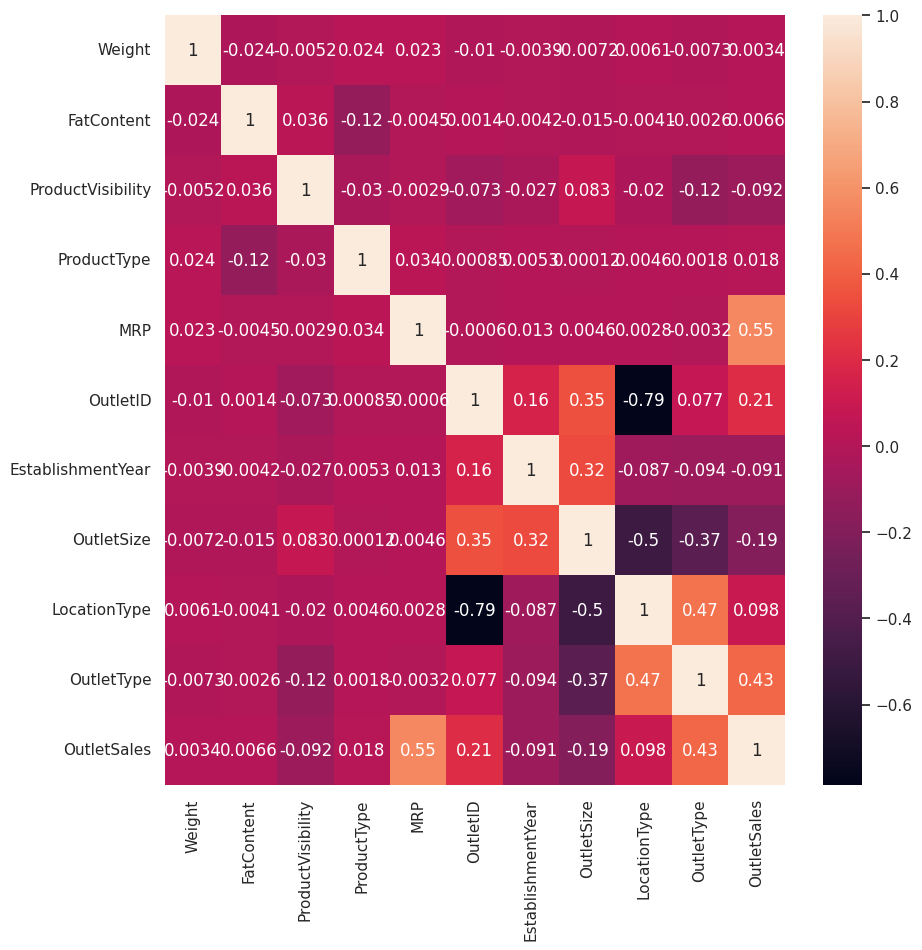

In [ ]:
#HEATMAP CORRELATION
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),fmt='.2g',annot=True)

In [ ]:
#TRAIN TEST SPLIT
x=data.drop("OutletSales",axis=1)
y=data["OutletSales"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#DECISION TREE REGRESSOR
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeRegressor()
param_grid={'max_depth':[2,4,6,8],'min_samples_split':[2,4,6,8],'min_samples_leaf':[1,2,3,4],'max_features':['auto','sqrt','log2']}
grid_search=GridSearchCV(dtree,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4}


In [ ]:
dtree=DecisionTreeRegressor(max_depth=6,max_features='auto',min_samples_leaf=4,min_samples_split=2)

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_leaf=4)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred=dtree.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print("MAE is {}".format(mae))
print("MAPE is {}".format(mape))
print("MSE is {}".format(mse))
print("R2 Score is {}".format(r2))
print("RMSE is {}".format(rmse))

MAE is 764.9872280051599
MAPE is 0.5784403446838259
MSE is 1245334.0275746458
R2 Score is 0.6233611975537985
RMSE is 1115.945351518006


Text(0, 0.5, 'Feature Name')

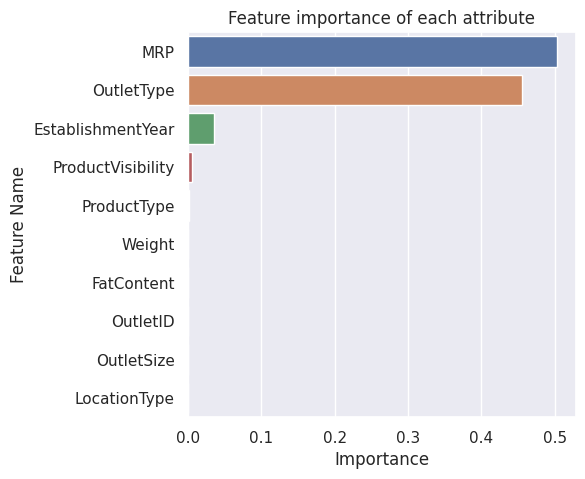

In [ ]:
imp_data=pd.DataFrame({"Feature Name":x_train.columns,"Importance":dtree.feature_importances_})
fi=imp_data.sort_values(by='Importance',ascending=False)
sns.barplot(data=fi,x="Importance",y="Feature Name")
plt.title("Feature importance of each attribute")
plt.xlabel("Importance")
plt.ylabel("Feature Name")

In [ ]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
param_grid={'max_depth':[3,5,7,9],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'max_features':['auto','sqrt']}

In [ ]:
grid_search=GridSearchCV(rf,param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
rf=RandomForestRegressor(max_depth=5,max_features='auto',min_samples_leaf=4,min_samples_split=2)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=5, max_features='auto', min_samples_leaf=4)

In [ ]:
y_pred=rf.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print("MAE is {}".format(mae))
print("MAPE is {}".format(mape))
print("MSE is {}".format(mse))
print("R2 Score is {}".format(r2))
print("RMSE is {}".format(rmse))

MAE is 754.7249110043322
MAPE is 0.580404147152516
MSE is 1199593.8867742838
R2 Score is 0.6371948449715281
RMSE is 1095.259734845705


Text(0, 0.5, 'Feature Name')

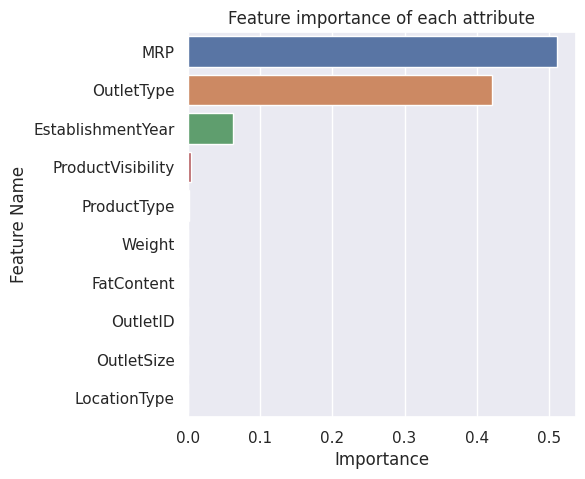

In [ ]:
imp_data=pd.DataFrame({"Feature Name":x_train.columns,"Importance":rf.feature_importances_})
fi=imp_data.sort_values(by='Importance',ascending=False)
sns.barplot(data=fi,x="Importance",y="Feature Name")
plt.title("Feature importance of each attribute")
plt.xlabel("Importance")
plt.ylabel("Feature Name")

In [ ]:
#XGBOOST REGRESSOR
from xgboost import XGBRegressor
xgb=XGBRegressor()
param_grid={'max_depth':[3,5,7,9],'min_child_weight':[1,3,5],'learning_rate':[0.1,0.01,0.001],'gamma':[0,1,5]}
grid_search=GridSearchCV(xgb,param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1}


In [ ]:
xgb=XGBRegressor(gamma=0,learning_rate=0.1,max_depth=3,min_child_weight=1)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred=xgb.predict(x_test)
mae=metrics.mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
r2=metrics.r2_score(y_test,y_pred)
rmse=math.sqrt(mse)

print("MAE is {}".format(mae))
print("MAPE is {}".format(mape))
print("MSE is {}".format(mse))
print("R2 Score is {}".format(r2))
print("RMSE is {}".format(rmse))

MAE is 754.4837491406836
MAPE is 0.5890650529183769
MSE is 1196676.6797329972
R2 Score is 0.6380771250202455
RMSE is 1093.9271820980578


In [ ]:
imp_data=pd.DataFrame({"Feature Name":x_train.columns,"Importance":xgb.feature_importances_})
fi=imp_data.sort_values(by='Importance',ascending=False)
sns.barplot(data=fi,x="Importance",y="Feature Name")
plt.title("Feature importance of each attribute")
plt.xlabel("Importance")
plt.ylabel("Feature Name")